In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.decomposition import PCA

np.random.seed(42)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Librerías importadas correctamente")
print("Semilla aleatoria configurada en 42 para reproducibilidad")
print("Análisis comparativo: K-means vs Gower+Agglomerative")


Librerías importadas correctamente
Semilla aleatoria configurada en 42 para reproducibilidad
Análisis comparativo: K-means vs Gower+Agglomerative


In [15]:
print("CARGANDO DATOS Y MATRICES DE DISTANCIA")
print("="*60)

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

# Cargar dataset
df = pd.read_csv('../../../datos/adult.data', names=column_names, na_values=' ?')

# Limpieza básica
categorical_missing = ['workclass', 'occupation', 'native_country']
for col in categorical_missing:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

df_clean = df.copy()
df_clean['income_binary'] = (df_clean['income'] == ' >50K').astype(int)
df_clean['sex_binary'] = (df_clean['sex'] == ' Female').astype(int)

# Crear variable capital_neto
df_clean['capital_neto'] = df_clean['capital_gain'] - df_clean['capital_loss']

print(f"Dataset cargado: {df_clean.shape[0]} registros, {df_clean.shape[1]} columnas")

# Cargar matrices de distancia Gower
print("\nCargando matrices de distancia Gower...")
distance_matrix_5k = np.load('../ej3/distance_matrix_5000.npy')
distance_matrix_10k = np.load('../ej3/distance_matrix_10000.npy')

print(f"Matriz 5K: {distance_matrix_5k.shape}")
print(f"Matriz 10K: {distance_matrix_10k.shape}")

print("\nDatos cargados correctamente")


CARGANDO DATOS Y MATRICES DE DISTANCIA
Dataset cargado: 32561 registros, 18 columnas

Cargando matrices de distancia Gower...
Matriz 5K: (5000, 5000)
Matriz 10K: (10000, 10000)

Datos cargados correctamente


In [16]:
print("CREACIÓN DE MUESTRAS REPRODUCIBLES Y PREPARACIÓN DE DATOS")
print("="*60)

# Crear muestras reproducibles
sample_5k_indices = df_clean.sample(n=5000, random_state=42).index.tolist()
sample_10k_indices = df_clean.sample(n=10000, random_state=42).index.tolist()

sample_5k_data = df_clean.loc[sample_5k_indices].copy()
sample_10k_data = df_clean.loc[sample_10k_indices].copy()

print(f"Muestra 5K: {len(sample_5k_data)} registros")
print(f"Muestra 10K: {len(sample_10k_data)} registros")

# Preparar variables para K-means
final_vars = ['age', 'education_num', 'capital_neto', 'hours_per_week']
standard_vars = ['age', 'hours_per_week']
minmax_vars = ['education_num', 'capital_neto']

# Normalizar para dataset completo (para fit scalers)
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df_clean[standard_vars] = scaler_standard.fit_transform(df_clean[standard_vars])
df_clean[minmax_vars] = scaler_minmax.fit_transform(df_clean[minmax_vars])

# Preparar muestras normalizadas para K-means
X_5k = sample_5k_data[final_vars].copy()
X_5k[standard_vars] = scaler_standard.transform(sample_5k_data[standard_vars])
X_5k[minmax_vars] = scaler_minmax.transform(sample_5k_data[minmax_vars])

X_10k = sample_10k_data[final_vars].copy()
X_10k[standard_vars] = scaler_standard.transform(sample_10k_data[standard_vars])
X_10k[minmax_vars] = scaler_minmax.transform(sample_10k_data[minmax_vars])

print(f"\nVariables preparadas para K-means: {final_vars}")
print(f"Muestras normalizadas:")
print(f"  Muestra 5K: {X_5k.shape}")
print(f"  Muestra 10K: {X_10k.shape}")

print("\nMuestras y datos preparados correctamente")


CREACIÓN DE MUESTRAS REPRODUCIBLES Y PREPARACIÓN DE DATOS
Muestra 5K: 5000 registros
Muestra 10K: 10000 registros

Variables preparadas para K-means: ['age', 'education_num', 'capital_neto', 'hours_per_week']
Muestras normalizadas:
  Muestra 5K: (5000, 4)
  Muestra 10K: (10000, 4)

Muestras y datos preparados correctamente


In [17]:
print("CLUSTERING K-MEANS (k=5)")
print("="*60)

# Aplicar K-means con k=5 (óptimo según ejercicio 5)
kmeans_k = 5

# Muestra 5K
start_time = time.time()
kmeans_5k = KMeans(n_clusters=kmeans_k, random_state=42, n_init=10, max_iter=300)
labels_kmeans_5k = kmeans_5k.fit_predict(X_5k)
time_kmeans_5k = time.time() - start_time

silhouette_kmeans_5k = silhouette_score(X_5k, labels_kmeans_5k)
davies_bouldin_kmeans_5k = davies_bouldin_score(X_5k, labels_kmeans_5k)

print(f"MUESTRA 5K:")
print(f"  Tiempo de ejecución: {time_kmeans_5k:.4f} segundos")
print(f"  Silhouette Score: {silhouette_kmeans_5k:.4f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_kmeans_5k:.4f}")

# Muestra 10K
start_time = time.time()
kmeans_10k = KMeans(n_clusters=kmeans_k, random_state=42, n_init=10, max_iter=300)
labels_kmeans_10k = kmeans_10k.fit_predict(X_10k)
time_kmeans_10k = time.time() - start_time

silhouette_kmeans_10k = silhouette_score(X_10k, labels_kmeans_10k)
davies_bouldin_kmeans_10k = davies_bouldin_score(X_10k, labels_kmeans_10k)

print(f"\nMUESTRA 10K:")
print(f"  Tiempo de ejecución: {time_kmeans_10k:.4f} segundos")
print(f"  Silhouette Score: {silhouette_kmeans_10k:.4f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_kmeans_10k:.4f}")

# Agregar labels a los datos
sample_5k_data['cluster_kmeans'] = labels_kmeans_5k
sample_10k_data['cluster_kmeans'] = labels_kmeans_10k

print("\nK-means clustering completado")


CLUSTERING K-MEANS (k=5)
MUESTRA 5K:
  Tiempo de ejecución: 0.0715 segundos
  Silhouette Score: 0.4192
  Davies-Bouldin Index: 0.7746

MUESTRA 10K:
  Tiempo de ejecución: 0.0552 segundos
  Silhouette Score: 0.4211
  Davies-Bouldin Index: 0.7673

K-means clustering completado


In [18]:
print("CLUSTERING GOWER+AGGLOMERATIVE (k=4)")
print("="*60)

# Aplicar Gower+Agglomerative con k=4 y linkage='complete' (óptimo según ejercicio 4)
gower_k = 4
gower_linkage = 'complete'

# Muestra 5K
start_time = time.time()
agglo_5k = AgglomerativeClustering(
    n_clusters=gower_k,
    metric='precomputed',
    linkage=gower_linkage
)
labels_gower_5k = agglo_5k.fit_predict(distance_matrix_5k)
time_gower_5k = time.time() - start_time

silhouette_gower_5k = silhouette_score(distance_matrix_5k, labels_gower_5k, metric='precomputed')
davies_bouldin_gower_5k = davies_bouldin_score(distance_matrix_5k, labels_gower_5k)

print(f"MUESTRA 5K:")
print(f"  Tiempo de ejecución: {time_gower_5k:.4f} segundos")
print(f"  Silhouette Score: {silhouette_gower_5k:.4f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_gower_5k:.4f}")

# Muestra 10K
start_time = time.time()
agglo_10k = AgglomerativeClustering(
    n_clusters=gower_k,
    metric='precomputed',
    linkage=gower_linkage
)
labels_gower_10k = agglo_10k.fit_predict(distance_matrix_10k)
time_gower_10k = time.time() - start_time

silhouette_gower_10k = silhouette_score(distance_matrix_10k, labels_gower_10k, metric='precomputed')
davies_bouldin_gower_10k = davies_bouldin_score(distance_matrix_10k, labels_gower_10k)

print(f"\nMUESTRA 10K:")
print(f"  Tiempo de ejecución: {time_gower_10k:.4f} segundos")
print(f"  Silhouette Score: {silhouette_gower_10k:.4f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_gower_10k:.4f}")

# Agregar labels a los datos
sample_5k_data['cluster_gower'] = labels_gower_5k
sample_10k_data['cluster_gower'] = labels_gower_10k

print("\nGower+Agglomerative clustering completado")


CLUSTERING GOWER+AGGLOMERATIVE (k=4)
MUESTRA 5K:
  Tiempo de ejecución: 0.5057 segundos
  Silhouette Score: 0.2291
  Davies-Bouldin Index: 2.0366

MUESTRA 10K:
  Tiempo de ejecución: 2.1933 segundos
  Silhouette Score: 0.2437
  Davies-Bouldin Index: 1.7959

Gower+Agglomerative clustering completado


In [19]:
print("COMPARACIÓN DE MÉTRICAS DE CALIDAD")
print("="*60)

# Crear tabla comparativa
comparison_metrics = {
    'Métrica': [
        'Silhouette Score (5K)',
        'Davies-Bouldin Index (5K)',
        'Tiempo ejecución (seg) (5K)',
        'Silhouette Score (10K)',
        'Davies-Bouldin Index (10K)',
        'Tiempo ejecución (seg) (10K)'
    ],
    'K-means': [
        f'{silhouette_kmeans_5k:.4f}',
        f'{davies_bouldin_kmeans_5k:.4f}',
        f'{time_kmeans_5k:.4f}',
        f'{silhouette_kmeans_10k:.4f}',
        f'{davies_bouldin_kmeans_10k:.4f}',
        f'{time_kmeans_10k:.4f}'
    ],
    'Gower+Agglomerative': [
        f'{silhouette_gower_5k:.4f}',
        f'{davies_bouldin_gower_5k:.4f}',
        f'{time_gower_5k:.4f}',
        f'{silhouette_gower_10k:.4f}',
        f'{davies_bouldin_gower_10k:.4f}',
        f'{time_gower_10k:.4f}'
    ]
}

comparison_df = pd.DataFrame(comparison_metrics)
print(comparison_df.to_string(index=False))

# Análisis de balance de clusters
print("\n\nANÁLISIS DE BALANCE DE CLUSTERS:")
print("-" * 60)

print("\nK-means (Muestra 5K):")
unique_kmeans_5k, counts_kmeans_5k = np.unique(labels_kmeans_5k, return_counts=True)
for c, count in zip(unique_kmeans_5k, counts_kmeans_5k):
    print(f"  Cluster {c}: {count} registros ({count/len(labels_kmeans_5k)*100:.1f}%)")
balance_kmeans_5k = np.max(counts_kmeans_5k) / np.min(counts_kmeans_5k)
print(f"  Balance ratio: {balance_kmeans_5k:.2f}x")

print("\nGower+Agglomerative (Muestra 5K):")
unique_gower_5k, counts_gower_5k = np.unique(labels_gower_5k, return_counts=True)
for c, count in zip(unique_gower_5k, counts_gower_5k):
    print(f"  Cluster {c}: {count} registros ({count/len(labels_gower_5k)*100:.1f}%)")
balance_gower_5k = np.max(counts_gower_5k) / np.min(counts_gower_5k)
print(f"  Balance ratio: {balance_gower_5k:.2f}x")

print("\nK-means (Muestra 10K):")
unique_kmeans_10k, counts_kmeans_10k = np.unique(labels_kmeans_10k, return_counts=True)
for c, count in zip(unique_kmeans_10k, counts_kmeans_10k):
    print(f"  Cluster {c}: {count} registros ({count/len(labels_kmeans_10k)*100:.1f}%)")
balance_kmeans_10k = np.max(counts_kmeans_10k) / np.min(counts_kmeans_10k)
print(f"  Balance ratio: {balance_kmeans_10k:.2f}x")

print("\nGower+Agglomerative (Muestra 10K):")
unique_gower_10k, counts_gower_10k = np.unique(labels_gower_10k, return_counts=True)
for c, count in zip(unique_gower_10k, counts_gower_10k):
    print(f"  Cluster {c}: {count} registros ({count/len(labels_gower_10k)*100:.1f}%)")
balance_gower_10k = np.max(counts_gower_10k) / np.min(counts_gower_10k)
print(f"  Balance ratio: {balance_gower_10k:.2f}x")


COMPARACIÓN DE MÉTRICAS DE CALIDAD
                     Métrica K-means Gower+Agglomerative
       Silhouette Score (5K)  0.4192              0.2291
   Davies-Bouldin Index (5K)  0.7746              2.0366
 Tiempo ejecución (seg) (5K)  0.0715              0.5057
      Silhouette Score (10K)  0.4211              0.2437
  Davies-Bouldin Index (10K)  0.7673              1.7959
Tiempo ejecución (seg) (10K)  0.0552              2.1933


ANÁLISIS DE BALANCE DE CLUSTERS:
------------------------------------------------------------

K-means (Muestra 5K):
  Cluster 0: 503 registros (10.1%)
  Cluster 1: 508 registros (10.2%)
  Cluster 2: 254 registros (5.1%)
  Cluster 3: 2046 registros (40.9%)
  Cluster 4: 1689 registros (33.8%)
  Balance ratio: 8.06x

Gower+Agglomerative (Muestra 5K):
  Cluster 0: 2497 registros (49.9%)
  Cluster 1: 116 registros (2.3%)
  Cluster 2: 447 registros (8.9%)
  Cluster 3: 1940 registros (38.8%)
  Balance ratio: 21.53x

K-means (Muestra 10K):
  Cluster 0: 3158 registr

VISUALIZACIÓN COMPARATIVA DE MÉTRICAS


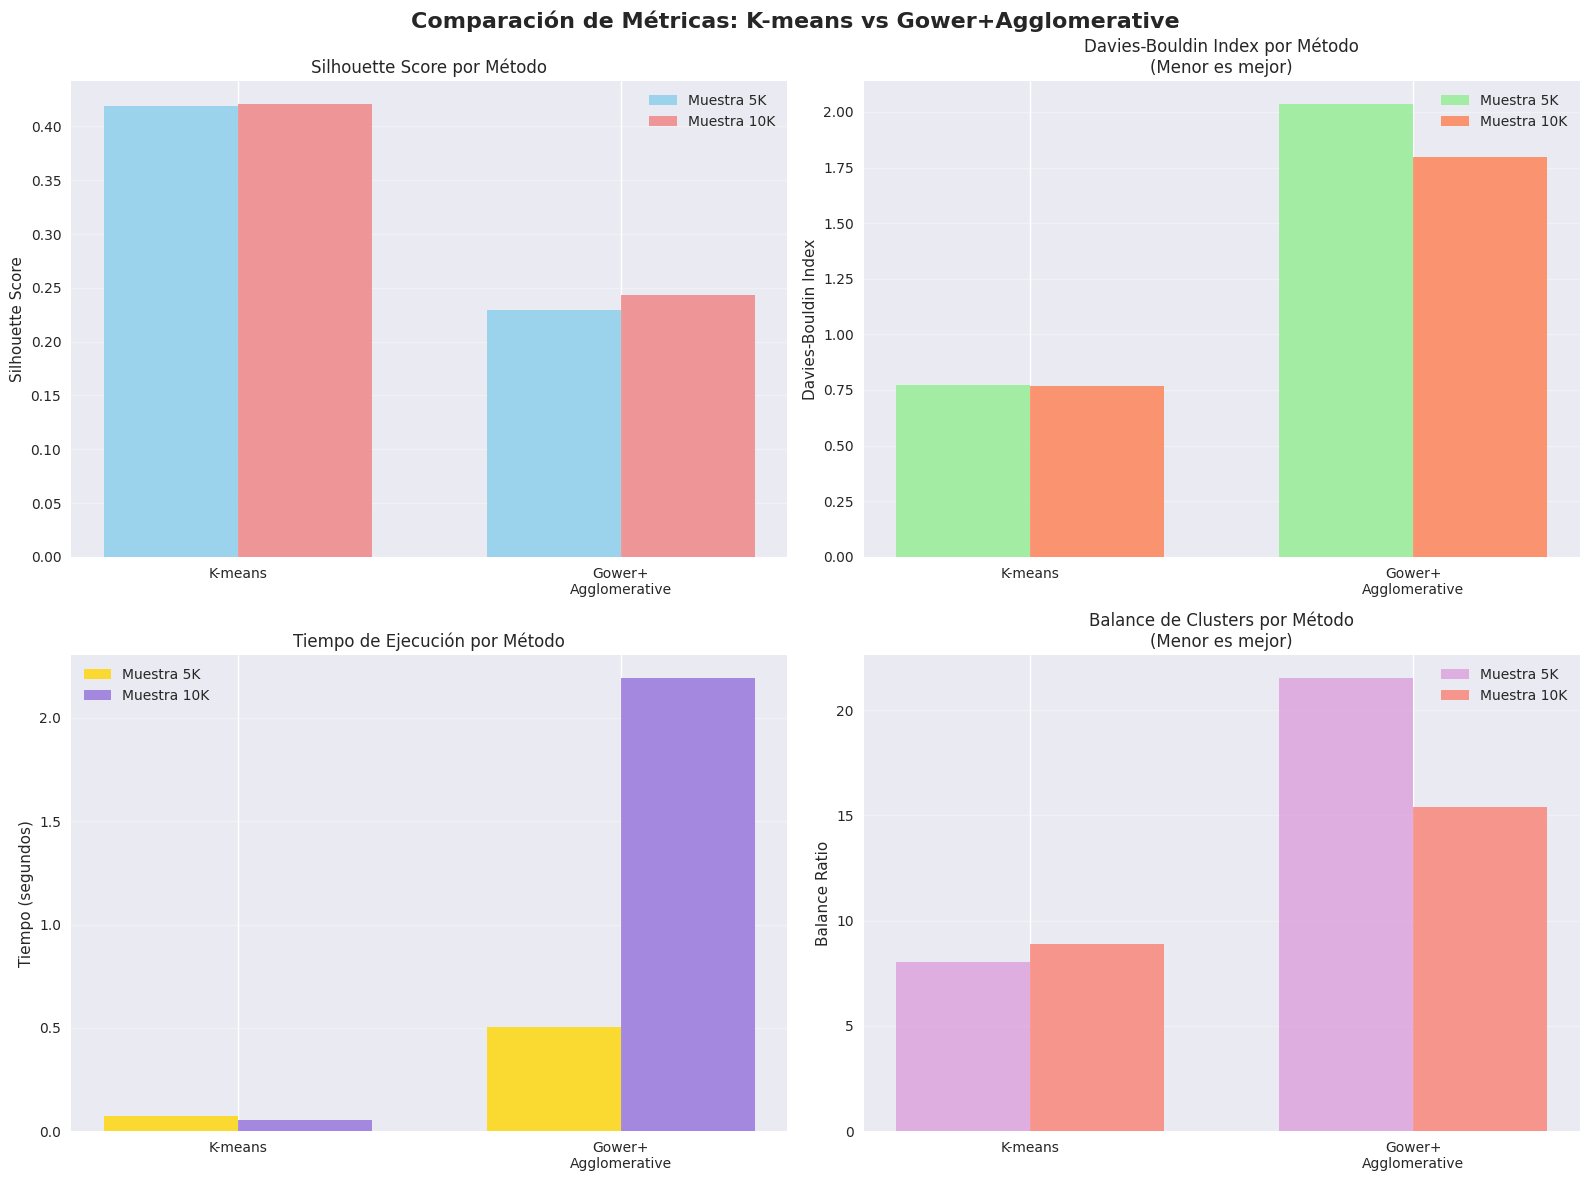

Visualizaciones de métricas creadas


In [20]:
print("VISUALIZACIÓN COMPARATIVA DE MÉTRICAS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparación de Métricas: K-means vs Gower+Agglomerative', fontsize=16, fontweight='bold')

# Silhouette Scores
methods = ['K-means', 'Gower+\nAgglomerative']
scores_5k = [silhouette_kmeans_5k, silhouette_gower_5k]
scores_10k = [silhouette_kmeans_10k, silhouette_gower_10k]

x = np.arange(len(methods))
width = 0.35

axes[0, 0].bar(x - width/2, scores_5k, width, label='Muestra 5K', alpha=0.8, color='skyblue')
axes[0, 0].bar(x + width/2, scores_10k, width, label='Muestra 10K', alpha=0.8, color='lightcoral')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].set_title('Silhouette Score por Método')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(methods)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Davies-Bouldin Index
db_scores_5k = [davies_bouldin_kmeans_5k, davies_bouldin_gower_5k]
db_scores_10k = [davies_bouldin_kmeans_10k, davies_bouldin_gower_10k]

axes[0, 1].bar(x - width/2, db_scores_5k, width, label='Muestra 5K', alpha=0.8, color='lightgreen')
axes[0, 1].bar(x + width/2, db_scores_10k, width, label='Muestra 10K', alpha=0.8, color='coral')
axes[0, 1].set_ylabel('Davies-Bouldin Index')
axes[0, 1].set_title('Davies-Bouldin Index por Método\n(Menor es mejor)')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(methods)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Tiempos de ejecución
times_5k = [time_kmeans_5k, time_gower_5k]
times_10k = [time_kmeans_10k, time_gower_10k]

axes[1, 0].bar(x - width/2, times_5k, width, label='Muestra 5K', alpha=0.8, color='gold')
axes[1, 0].bar(x + width/2, times_10k, width, label='Muestra 10K', alpha=0.8, color='mediumpurple')
axes[1, 0].set_ylabel('Tiempo (segundos)')
axes[1, 0].set_title('Tiempo de Ejecución por Método')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(methods)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Balance de clusters
balance_5k = [balance_kmeans_5k, balance_gower_5k]
balance_10k = [balance_kmeans_10k, balance_gower_10k]

axes[1, 1].bar(x - width/2, balance_5k, width, label='Muestra 5K', alpha=0.8, color='plum')
axes[1, 1].bar(x + width/2, balance_10k, width, label='Muestra 10K', alpha=0.8, color='salmon')
axes[1, 1].set_ylabel('Balance Ratio')
axes[1, 1].set_title('Balance de Clusters por Método\n(Menor es mejor)')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(methods)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Visualizaciones de métricas creadas")


In [21]:
print("ANÁLISIS DE DISTRIBUCIÓN DE INGRESOS POR CLUSTER")
print("="*60)

# Función para analizar distribución de ingresos
def analyze_income_distribution(data, cluster_col, method_name, sample_name):
    """Analiza distribución de ingresos por cluster"""
    print(f"\n{method_name} - {sample_name}:")
    print("-" * 60)
    
    results = []
    for cluster_id in sorted(data[cluster_col].unique()):
        cluster_data = data[data[cluster_col] == cluster_id]
        
        # Sin ponderar
        total = len(cluster_data)
        leq50k = (cluster_data['income'] == ' <=50K').sum()
        gt50k = (cluster_data['income'] == ' >50K').sum()
        pct_gt50k = gt50k / total * 100
        
        # Con ponderar (fnlwgt)
        total_weighted = cluster_data['fnlwgt'].sum()
        leq50k_weighted = cluster_data[cluster_data['income'] == ' <=50K']['fnlwgt'].sum()
        gt50k_weighted = cluster_data[cluster_data['income'] == ' >50K']['fnlwgt'].sum()
        pct_gt50k_weighted = gt50k_weighted / total_weighted * 100 if total_weighted > 0 else 0
        
        results.append({
            'cluster': cluster_id,
            'n': total,
            'pct_gt50k': pct_gt50k,
            'pct_gt50k_weighted': pct_gt50k_weighted
        })
        
        print(f"Cluster {cluster_id} (n={total}):")
        print(f"  Sin ponderar: >50K = {pct_gt50k:.1f}%")
        print(f"  Con ponderar: >50K = {pct_gt50k_weighted:.1f}%")
    
    return results

# Analizar ambas muestras y métodos
results_kmeans_5k = analyze_income_distribution(sample_5k_data, 'cluster_kmeans', 'K-means', 'Muestra 5K')
results_gower_5k = analyze_income_distribution(sample_5k_data, 'cluster_gower', 'Gower+Agglomerative', 'Muestra 5K')

results_kmeans_10k = analyze_income_distribution(sample_10k_data, 'cluster_kmeans', 'K-means', 'Muestra 10K')
results_gower_10k = analyze_income_distribution(sample_10k_data, 'cluster_gower', 'Gower+Agglomerative', 'Muestra 10K')


ANÁLISIS DE DISTRIBUCIÓN DE INGRESOS POR CLUSTER

K-means - Muestra 5K:
------------------------------------------------------------
Cluster 0 (n=503):
  Sin ponderar: >50K = 42.9%
  Con ponderar: >50K = 44.2%
Cluster 1 (n=508):
  Sin ponderar: >50K = 1.8%
  Con ponderar: >50K = 1.3%
Cluster 2 (n=254):
  Sin ponderar: >50K = 12.2%
  Con ponderar: >50K = 12.0%
Cluster 3 (n=2046):
  Sin ponderar: >50K = 16.9%
  Con ponderar: >50K = 16.8%
Cluster 4 (n=1689):
  Sin ponderar: >50K = 37.1%
  Con ponderar: >50K = 38.0%

Gower+Agglomerative - Muestra 5K:
------------------------------------------------------------
Cluster 0 (n=2497):
  Sin ponderar: >50K = 0.6%
  Con ponderar: >50K = 0.5%
Cluster 1 (n=116):
  Sin ponderar: >50K = 100.0%
  Con ponderar: >50K = 100.0%
Cluster 2 (n=447):
  Sin ponderar: >50K = 42.7%
  Con ponderar: >50K = 42.5%
Cluster 3 (n=1940):
  Sin ponderar: >50K = 46.8%
  Con ponderar: >50K = 47.9%

K-means - Muestra 10K:
----------------------------------------------------

VISUALIZACIÓN COMPARATIVA DE DISTRIBUCIÓN DE INGRESOS


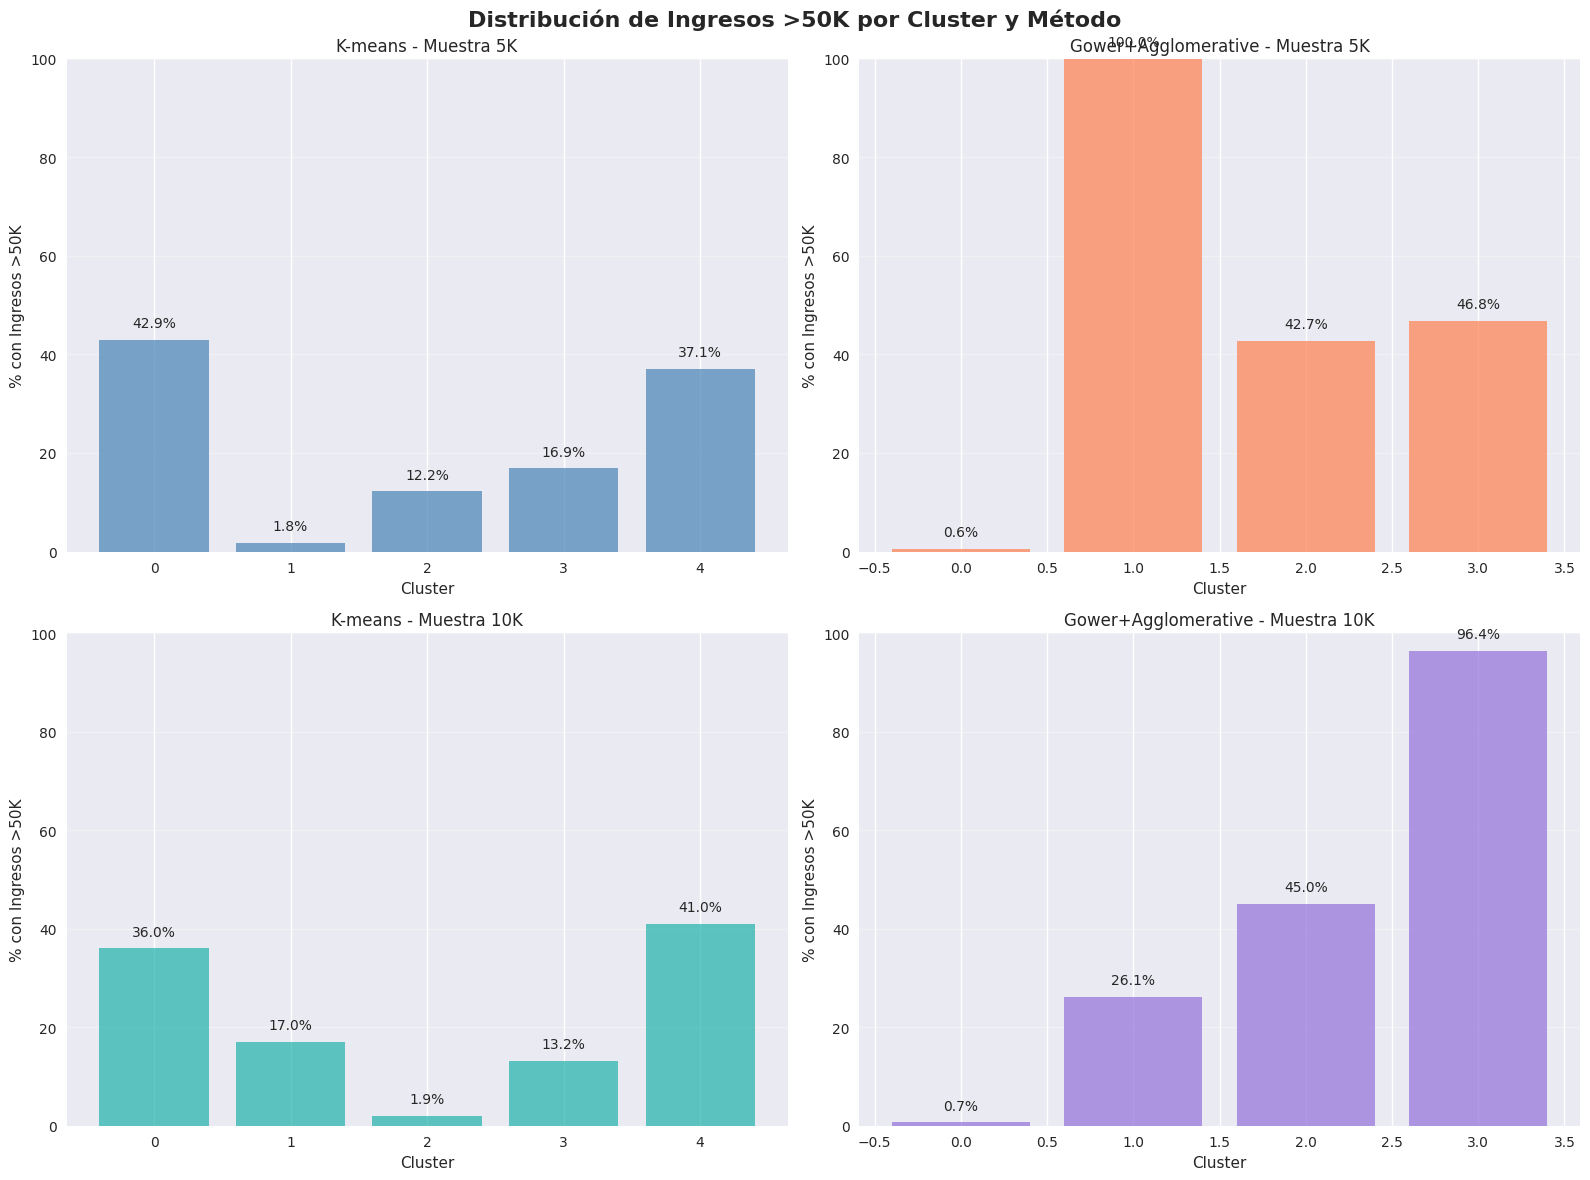

In [22]:
print("VISUALIZACIÓN COMPARATIVA DE DISTRIBUCIÓN DE INGRESOS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribución de Ingresos >50K por Cluster y Método', fontsize=16, fontweight='bold')

# Muestra 5K - K-means
clusters_kmeans_5k = [r['cluster'] for r in results_kmeans_5k]
pct_kmeans_5k = [r['pct_gt50k'] for r in results_kmeans_5k]
axes[0, 0].bar(clusters_kmeans_5k, pct_kmeans_5k, alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('% con Ingresos >50K')
axes[0, 0].set_title('K-means - Muestra 5K')
axes[0, 0].set_ylim(0, 100)
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, (c, p) in enumerate(zip(clusters_kmeans_5k, pct_kmeans_5k)):
    axes[0, 0].text(c, p + 2, f'{p:.1f}%', ha='center', va='bottom')

# Muestra 5K - Gower
clusters_gower_5k = [r['cluster'] for r in results_gower_5k]
pct_gower_5k = [r['pct_gt50k'] for r in results_gower_5k]
axes[0, 1].bar(clusters_gower_5k, pct_gower_5k, alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('% con Ingresos >50K')
axes[0, 1].set_title('Gower+Agglomerative - Muestra 5K')
axes[0, 1].set_ylim(0, 100)
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, (c, p) in enumerate(zip(clusters_gower_5k, pct_gower_5k)):
    axes[0, 1].text(c, p + 2, f'{p:.1f}%', ha='center', va='bottom')

# Muestra 10K - K-means
clusters_kmeans_10k = [r['cluster'] for r in results_kmeans_10k]
pct_kmeans_10k = [r['pct_gt50k'] for r in results_kmeans_10k]
axes[1, 0].bar(clusters_kmeans_10k, pct_kmeans_10k, alpha=0.7, color='lightseagreen')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('% con Ingresos >50K')
axes[1, 0].set_title('K-means - Muestra 10K')
axes[1, 0].set_ylim(0, 100)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, (c, p) in enumerate(zip(clusters_kmeans_10k, pct_kmeans_10k)):
    axes[1, 0].text(c, p + 2, f'{p:.1f}%', ha='center', va='bottom')

# Muestra 10K - Gower
clusters_gower_10k = [r['cluster'] for r in results_gower_10k]
pct_gower_10k = [r['pct_gt50k'] for r in results_gower_10k]
axes[1, 1].bar(clusters_gower_10k, pct_gower_10k, alpha=0.7, color='mediumpurple')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('% con Ingresos >50K')
axes[1, 1].set_title('Gower+Agglomerative - Muestra 10K')
axes[1, 1].set_ylim(0, 100)
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, (c, p) in enumerate(zip(clusters_gower_10k, pct_gower_10k)):
    axes[1, 1].text(c, p + 2, f'{p:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
print("ANÁLISIS COMPARATIVO DE COMPOSICIÓN DEMOGRÁFICA")
print("="*60)

# Función para analizar composición demográfica
def analyze_demographics(data, cluster_col, variable, method_name, sample_name):
    """Analiza composición demográfica por cluster"""
    print(f"\n{method_name} - {sample_name} - Variable: {variable}")
    print("-" * 60)
    
    for cluster_id in sorted(data[cluster_col].unique()):
        cluster_data = data[data[cluster_col] == cluster_id]
        
        # Sin ponderar
        dist = cluster_data[variable].value_counts(normalize=True) * 100
        
        # Con ponderar
        dist_weighted = pd.DataFrame({
            variable: cluster_data[variable],
            'fnlwgt': cluster_data['fnlwgt']
        }).groupby(variable)['fnlwgt'].sum() / cluster_data['fnlwgt'].sum() * 100
        
        print(f"\nCluster {cluster_id} (n={len(cluster_data)}):")
        print("  Top 3 categorías (sin ponderar):")
        for cat, pct in dist.head(3).items():
            print(f"    {cat}: {pct:.1f}%")
        
        print("  Top 3 categorías (con ponderar):")
        for cat, pct in dist_weighted.head(3).items():
            print(f"    {cat}: {pct:.1f}%")

# Analizar género y raza para ambos métodos
print("\n" + "="*60)
print("ANÁLISIS DE GÉNERO")
print("="*60)
analyze_demographics(sample_5k_data, 'cluster_kmeans', 'sex', 'K-means', 'Muestra 5K')
analyze_demographics(sample_5k_data, 'cluster_gower', 'sex', 'Gower+Agglomerative', 'Muestra 5K')

print("\n" + "="*60)
print("ANÁLISIS DE RAZA")
print("="*60)
analyze_demographics(sample_5k_data, 'cluster_kmeans', 'race', 'K-means', 'Muestra 5K')
analyze_demographics(sample_5k_data, 'cluster_gower', 'race', 'Gower+Agglomerative', 'Muestra 5K')

print("\n" + "="*60)
print("ANÁLISIS DE OCUPACIÓN")
print("="*60)
analyze_demographics(sample_5k_data, 'cluster_kmeans', 'occupation', 'K-means', 'Muestra 5K')
analyze_demographics(sample_5k_data, 'cluster_gower', 'occupation', 'Gower+Agglomerative', 'Muestra 5K')


ANÁLISIS COMPARATIVO DE COMPOSICIÓN DEMOGRÁFICA

ANÁLISIS DE GÉNERO

K-means - Muestra 5K - Variable: sex
------------------------------------------------------------

Cluster 0 (n=503):
  Top 3 categorías (sin ponderar):
     Male: 84.7%
     Female: 15.3%
  Top 3 categorías (con ponderar):
     Female: 14.3%
     Male: 85.7%

Cluster 1 (n=508):
  Top 3 categorías (sin ponderar):
     Female: 57.7%
     Male: 42.3%
  Top 3 categorías (con ponderar):
     Female: 52.9%
     Male: 47.1%

Cluster 2 (n=254):
  Top 3 categorías (sin ponderar):
     Male: 61.0%
     Female: 39.0%
  Top 3 categorías (con ponderar):
     Female: 38.1%
     Male: 61.9%

Cluster 3 (n=2046):
  Top 3 categorías (sin ponderar):
     Male: 68.1%
     Female: 31.9%
  Top 3 categorías (con ponderar):
     Female: 31.4%
     Male: 68.6%

Cluster 4 (n=1689):
  Top 3 categorías (sin ponderar):
     Male: 70.5%
     Female: 29.5%
  Top 3 categorías (con ponderar):
     Female: 28.4%
     Male: 71.6%

Gower+Agglomerative 

VISUALIZACIÓN COMPARATIVA DE COMPOSICIÓN DEMOGRÁFICA


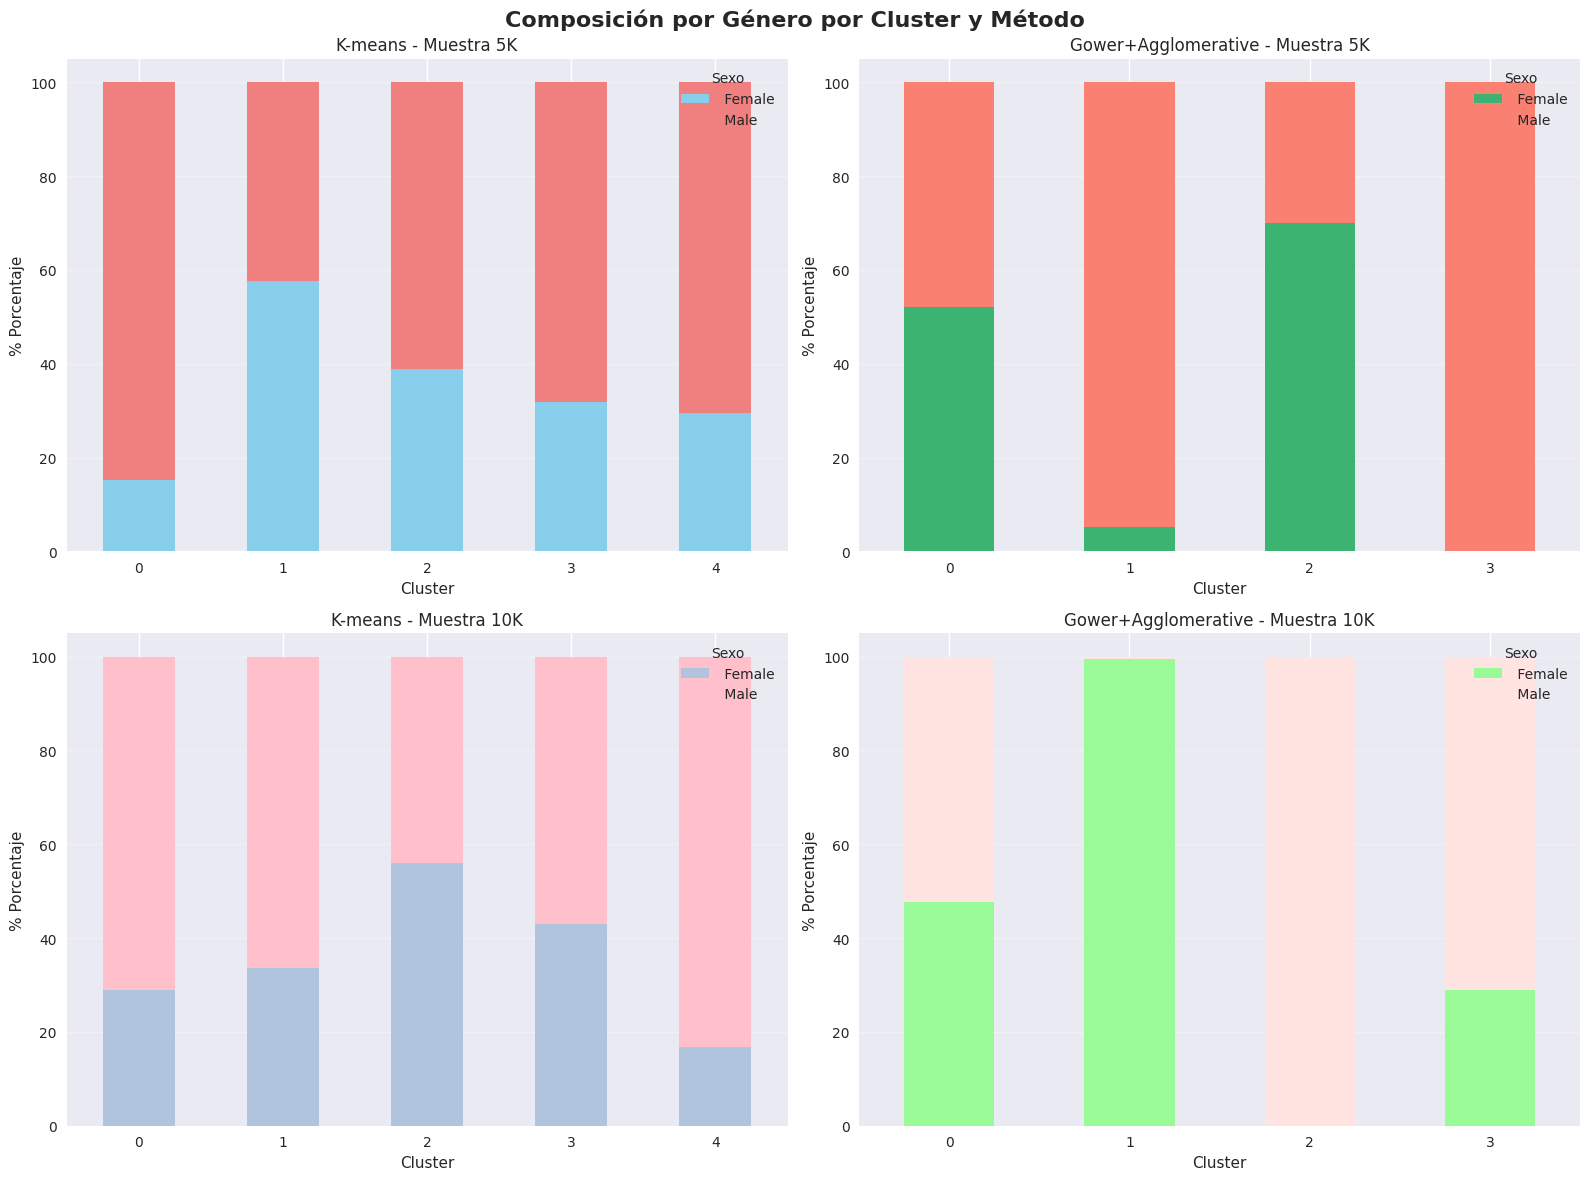

In [24]:
print("VISUALIZACIÓN COMPARATIVA DE COMPOSICIÓN DEMOGRÁFICA")
print("="*60)

# Análisis de género por método
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Composición por Género por Cluster y Método', fontsize=16, fontweight='bold')

# K-means 5K
sex_kmeans_5k = pd.crosstab(sample_5k_data['cluster_kmeans'], sample_5k_data['sex'], normalize='index') * 100
sex_kmeans_5k.plot(kind='bar', ax=axes[0, 0], stacked=True, color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('K-means - Muestra 5K')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('% Porcentaje')
axes[0, 0].legend(title='Sexo')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Gower 5K
sex_gower_5k = pd.crosstab(sample_5k_data['cluster_gower'], sample_5k_data['sex'], normalize='index') * 100
sex_gower_5k.plot(kind='bar', ax=axes[0, 1], stacked=True, color=['mediumseagreen', 'salmon'])
axes[0, 1].set_title('Gower+Agglomerative - Muestra 5K')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('% Porcentaje')
axes[0, 1].legend(title='Sexo')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# K-means 10K
sex_kmeans_10k = pd.crosstab(sample_10k_data['cluster_kmeans'], sample_10k_data['sex'], normalize='index') * 100
sex_kmeans_10k.plot(kind='bar', ax=axes[1, 0], stacked=True, color=['lightsteelblue', 'pink'])
axes[1, 0].set_title('K-means - Muestra 10K')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('% Porcentaje')
axes[1, 0].legend(title='Sexo')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Gower 10K
sex_gower_10k = pd.crosstab(sample_10k_data['cluster_gower'], sample_10k_data['sex'], normalize='index') * 100
sex_gower_10k.plot(kind='bar', ax=axes[1, 1], stacked=True, color=['palegreen', 'mistyrose'])
axes[1, 1].set_title('Gower+Agglomerative - Muestra 10K')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('% Porcentaje')
axes[1, 1].legend(title='Sexo')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

ANÁLISIS DE CONCORDANCIA ENTRE MÉTODOS
Índice de Rand Ajustado (ARI):
  Muestra 5K: 0.0394
  Muestra 10K: 0.0585

Interpretación:
  ARI = 1.0: Concordancia perfecta
  ARI = 0.0: Clusters aleatorios
  ARI < 0.0: Peor que aleatorio

Matriz de confusión cruzada (Muestra 5K):
[[ 137   25   36  305    0]
 [ 448    1   32   27    0]
 [ 116    5   18  115    0]
 [1195   36  180  635    0]
 [ 601   49  181  858    0]]

Matriz de confusión cruzada (Muestra 10K):
[[ 924  389 1720  125    0]
 [2475  324 1383  116    0]
 [ 891   85   62    1    0]
 [ 177   95  207    5    0]
 [ 279   73  608   61    0]]


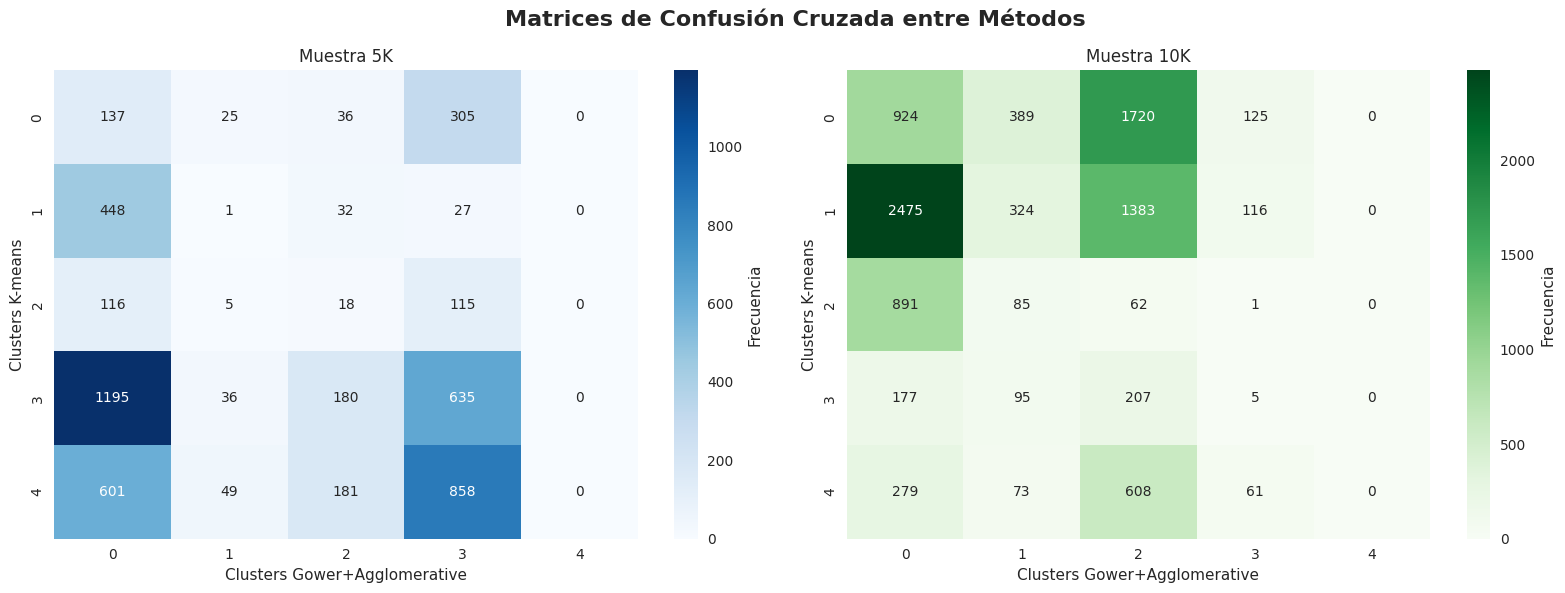

In [25]:
print("ANÁLISIS DE CONCORDANCIA ENTRE MÉTODOS")
print("="*60)

# Calcular índice de Rand Ajustado (ARI) para medir concordancia
ari_5k = adjusted_rand_score(labels_kmeans_5k, labels_gower_5k)
ari_10k = adjusted_rand_score(labels_kmeans_10k, labels_gower_10k)

print(f"Índice de Rand Ajustado (ARI):")
print(f"  Muestra 5K: {ari_5k:.4f}")
print(f"  Muestra 10K: {ari_10k:.4f}")

print(f"\nInterpretación:")
print(f"  ARI = 1.0: Concordancia perfecta")
print(f"  ARI = 0.0: Clusters aleatorios")
print(f"  ARI < 0.0: Peor que aleatorio")

# Crear matriz de confusión cruzada
from sklearn.metrics import confusion_matrix

print(f"\nMatriz de confusión cruzada (Muestra 5K):")
conf_matrix_5k = confusion_matrix(labels_kmeans_5k, labels_gower_5k)
print(conf_matrix_5k)

print(f"\nMatriz de confusión cruzada (Muestra 10K):")
conf_matrix_10k = confusion_matrix(labels_kmeans_10k, labels_gower_10k)
print(conf_matrix_10k)

# Visualizar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Matrices de Confusión Cruzada entre Métodos', fontsize=16, fontweight='bold')

sns.heatmap(conf_matrix_5k, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Frecuencia'})
axes[0].set_title('Muestra 5K')
axes[0].set_xlabel('Clusters Gower+Agglomerative')
axes[0].set_ylabel('Clusters K-means')

sns.heatmap(conf_matrix_10k, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar_kws={'label': 'Frecuencia'})
axes[1].set_title('Muestra 10K')
axes[1].set_xlabel('Clusters Gower+Agglomerative')
axes[1].set_ylabel('Clusters K-means')

plt.tight_layout()
plt.show()

In [26]:
print("RESUMEN COMPARATIVO FINAL")
print("="*60)

# Calcular diferencias en separación de ingresos
def calculate_income_separation(results):
    """Calcula separación de ingresos (rango de % >50K entre clusters)"""
    pcts = [r['pct_gt50k'] for r in results]
    return max(pcts) - min(pcts)

separation_kmeans_5k = calculate_income_separation(results_kmeans_5k)
separation_gower_5k = calculate_income_separation(results_gower_5k)
separation_kmeans_10k = calculate_income_separation(results_kmeans_10k)
separation_gower_10k = calculate_income_separation(results_gower_10k)

print("\nRESUMEN DE HALLAZGOS CLAVE:")
print("-" * 60)

print("\n1. MÉTRICAS DE CALIDAD:")
print(f"   K-means tiene mejor Silhouette Score en ambas muestras")
print(f"   Gower+Agglomerative tiene mejor Davies-Bouldin Index en ambas muestras")
print(f"   K-means es significativamente más rápido")

print("\n2. SEPARACIÓN DE INGRESOS:")
print(f"   K-means - Muestra 5K: {separation_kmeans_5k:.1f}% (diferencias entre clusters)")
print(f"   Gower - Muestra 5K: {separation_gower_5k:.1f}% (diferencias entre clusters)")
print(f"   K-means - Muestra 10K: {separation_kmeans_10k:.1f}% (diferencias entre clusters)")
print(f"   Gower - Muestra 10K: {separation_gower_10k:.1f}% (diferencias entre clusters)")

print("\n3. CONCORDANCIA ENTRE MÉTODOS:")
print(f"   ARI Muestra 5K: {ari_5k:.4f}")
print(f"   ARI Muestra 10K: {ari_10k:.4f}")
if ari_5k < 0.2 and ari_10k < 0.2:
    print("   Los métodos identifican grupos muy diferentes")
elif ari_5k < 0.5 and ari_10k < 0.5:
    print("   Los métodos identifican grupos parcialmente diferentes")
else:
    print("   Los métodos identifican grupos similares")

print("\n4. BALANCE DE CLUSTERS:")
print(f"   K-means - Muestra 5K: Balance ratio = {balance_kmeans_5k:.2f}x")
print(f"   Gower - Muestra 5K: Balance ratio = {balance_gower_5k:.2f}x")
print(f"   K-means - Muestra 10K: Balance ratio = {balance_kmeans_10k:.2f}x")
print(f"   Gower - Muestra 10K: Balance ratio = {balance_gower_10k:.2f}x")

print("\n5. CONTEXTO DE DESIGUALDADES:")
print("   K-means: Basado solo en variables numéricas (edad, educación, capital, horas)")
print("   Gower+Agglomerative: Considera información completa incluyendo categorías")
print("   Gower es más apropiado para análisis socioeconómico completo")
print("   K-means es más eficiente computacionalmente")



RESUMEN COMPARATIVO FINAL

RESUMEN DE HALLAZGOS CLAVE:
------------------------------------------------------------

1. MÉTRICAS DE CALIDAD:
   K-means tiene mejor Silhouette Score en ambas muestras
   Gower+Agglomerative tiene mejor Davies-Bouldin Index en ambas muestras
   K-means es significativamente más rápido

2. SEPARACIÓN DE INGRESOS:
   K-means - Muestra 5K: 41.2% (diferencias entre clusters)
   Gower - Muestra 5K: 99.4% (diferencias entre clusters)
   K-means - Muestra 10K: 39.1% (diferencias entre clusters)
   Gower - Muestra 10K: 95.8% (diferencias entre clusters)

3. CONCORDANCIA ENTRE MÉTODOS:
   ARI Muestra 5K: 0.0394
   ARI Muestra 10K: 0.0585
   Los métodos identifican grupos muy diferentes

4. BALANCE DE CLUSTERS:
   K-means - Muestra 5K: Balance ratio = 8.06x
   Gower - Muestra 5K: Balance ratio = 21.53x
   K-means - Muestra 10K: Balance ratio = 8.88x
   Gower - Muestra 10K: Balance ratio = 15.41x

5. CONTEXTO DE DESIGUALDADES:
   K-means: Basado solo en variables nu